# Importing libraries and dataset

In [25]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Basic data exploration
The y_train and y_test sginify what type of clothing is on the images in X_train and X_test, numbers in those columns represent:
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [27]:
print(X_train.shape)

(60000, 28, 28)


In [28]:
print(y_train.shape)

(60000,)


In [29]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [30]:
print(y_train[0])

9


<AxesSubplot:>

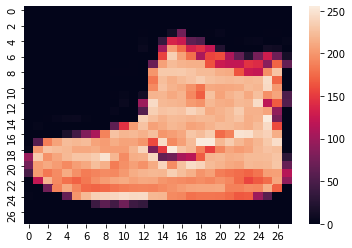

In [31]:
sns.heatmap(X_train[0])

# Data preparation

Normalization of data

In [32]:
X_test = X_test/255
X_train = X_train/255

In [33]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

<AxesSubplot:>

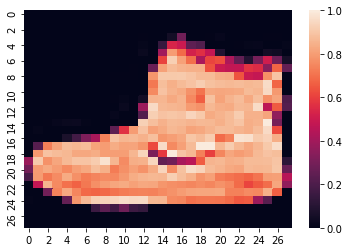

In [34]:
sns.heatmap(X_train[0])

Now we flatten the image, so that in can be inputed to neural network

In [35]:
X_train.shape

(60000, 28, 28)

In [36]:
X_test.shape

(10000, 28, 28)

In [37]:
X_train_flat = X_train.reshape(60000,784)
X_test_flat = X_test.reshape(10000,784)

Now we need to one code the label

In [38]:
y_train = pd.get_dummies(y_train)
y_train.columns = ["T-shirt/top","Trouser","Pullover", "Dress", "Coat","Sandal","Shirt","Sneaker","Bag" ,"Ankle_boot"]
y_train.head()

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle_boot
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [39]:
y_test = pd.get_dummies(y_test)
y_test.columns = ["T-shirt/top","Trouser","Pullover", "Dress", "Coat","Sandal","Shirt","Sneaker","Bag" ,"Ankle_boot"]
y_test.head()

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle_boot
0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0


# Basic neural networks

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,InputLayer
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix

First model, rectified linear unit as activation function, one dropout layer

In [41]:
model1 = Sequential()
model1.add(InputLayer(784))
model1.add(Dense(128,activation = "relu"))
model1.add(Dense(128,activation = "relu"))
model1.add(Dense(128,activation = "relu"))
model1.add(Dropout(0.3))

model1.add(Dense(units=10, activation='softmax'))
model1.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [42]:
model1.fit(X_train_flat, y_train, batch_size=128, epochs=50, verbose=1,validation_data=(X_train_flat, y_train))

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 0.5743 - accuracy: 0.7969 - val_loss: 0.4085 - val_accuracy: 0.8524
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3909 - accuracy: 0.8593 - val_loss: 0.3422 - val_accuracy: 0.8742
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3509 - accuracy: 0.8735 - val_loss: 0.3077 - val_accuracy: 0.8874
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3263 - accuracy: 0.8802 - val_loss: 0.2971 - val_accuracy: 0.8889
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3076 - accuracy: 0.8865 - val_loss: 0.2790 - val_accuracy: 0.8961
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2915 - accuracy: 0.8939 - val_loss: 0.2687 - val_accuracy: 0.8965
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2813 - accuracy: 0.8954 - val_loss: 0.2633 - val_accuracy: 0.9003
Epoch 

Making predictions, and converting to categorical values from propability

In [43]:
predictions = model1.predict(X_test_flat)
for  index,prediction_vector in enumerate(predictions):
    max_index = np.argmax(prediction_vector)
    predictions[index] = np.zeros(len(prediction_vector))
    predictions[index][max_index] = 1

313/313 [==============================] - 0s 1ms/step


In [44]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       936
           1       0.98      0.98      0.98       994
           2       0.82      0.82      0.82       996
           3       0.91      0.88      0.89      1031
           4       0.84      0.81      0.83      1039
           5       0.96      0.98      0.97       977
           6       0.72      0.73      0.72       991
           7       0.97      0.95      0.96      1028
           8       0.98      0.97      0.97      1010
           9       0.96      0.96      0.96       998

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000
 samples avg       0.90      0.90      0.90     10000



Secound model tanh as activation function, one dropout layer

In [45]:
model2 = Sequential()
model2.add(InputLayer(784))
model2.add(Dense(128,activation = "tanh"))
model2.add(Dense(128,activation = "tanh"))
model2.add(Dense(128,activation = "tanh"))
model2.add(Dropout(0.3))

model2.add(Dense(units=10, activation='softmax'))
model2.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [46]:
model2.fit(X_train_flat, y_train, batch_size=128, epochs=50, verbose=1,validation_data=(X_train_flat, y_train))

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 0.5398 - accuracy: 0.8062 - val_loss: 0.4389 - val_accuracy: 0.8346
Epoch 2/50
469/469 [==============================] - 3s 5ms/step - loss: 0.4003 - accuracy: 0.8557 - val_loss: 0.3641 - val_accuracy: 0.8659
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3626 - accuracy: 0.8688 - val_loss: 0.3131 - val_accuracy: 0.8857
Epoch 4/50
469/469 [==============================] - 3s 5ms/step - loss: 0.3368 - accuracy: 0.8770 - val_loss: 0.3191 - val_accuracy: 0.8820
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3204 - accuracy: 0.8836 - val_loss: 0.3173 - val_accuracy: 0.8819
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3021 - accuracy: 0.8896 - val_loss: 0.2712 - val_accuracy: 0.8999
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2926 - accuracy: 0.8925 - val_loss: 0.2711 - val_accuracy: 0.9010
Epoch 

In [47]:
predictions = model1.predict(X_test_flat)
for  index,prediction_vector in enumerate(predictions):
    max_index = np.argmax(prediction_vector)
    predictions[index] = np.zeros(len(prediction_vector))
    predictions[index][max_index] = 1

313/313 [==============================] - 0s 1ms/step


In [48]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       936
           1       0.98      0.98      0.98       994
           2       0.82      0.82      0.82       996
           3       0.91      0.88      0.89      1031
           4       0.84      0.81      0.83      1039
           5       0.96      0.98      0.97       977
           6       0.72      0.73      0.72       991
           7       0.97      0.95      0.96      1028
           8       0.98      0.97      0.97      1010
           9       0.96      0.96      0.96       998

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000
 samples avg       0.90      0.90      0.90     10000

